#Importing Libraries

In [1]:
import seaborn as snp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
path=r'C:\Users\Lenovo\Desktop\DATA SETS\NaukriJObs'
os.listdir(path)
os.chdir(path)
data = pd.read_csv("GIM_Dataset.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0,AGMT0,1,6.0,3.0,9.0,641012.0,CD05694,3.0,NonTechnical,0.000000,...,GRADUATE,MOBILE,100.000000,6.0,15.0,N,OWNED,0.000000,0.833333,1.0
1,AGMT1,0,2.0,1.0,14.0,641008.0,CD01280,3.0,NonTechnical,17.666667,...,SSC,TV,16.666667,1.0,18.0,N,OWNED,0.333333,0.500000,1.0
2,AGMT2,1,1.0,1.0,3.0,638660.0,CD05215,3.0,NonTechnical,20.000000,...,SSC,MOBILE,16.666667,1.0,10.0,N,OWNED,0.000000,0.666667,0.0
3,AGMT3,0,0.0,0.0,4.0,413113.0,CD04268,3.0,Technical,16.250000,...,PROFESSIONAL,TV,0.000000,0.0,9.0,N,OWNED,0.200000,0.400000,0.0
4,AGMT4,0,0.0,0.0,3.0,415519.0,CD11589,3.0,NonTechnical,19.333333,...,12TH,MOBILE,0.000000,0.0,15.0,N,OWNED,0.500000,0.000000,0.0


In [3]:
data.describe()

,V2,V3,V4,V5,V6,V8,V10,V11,V12,V16,V20,V21,V22,V25,V26,V27
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.209317,0.717083,0.501550,1.219133,549922.126233,2.079633,11.030585,0.321650,0.803917,1988.669967,13.230660,0.642017,10.898200,0.166016,0.280063,0.237300
std,0.406824,1.400681,0.926793,3.064224,94820.978162,1.133025,8.608485,1.192832,1.613943,798.943533,24.815495,1.277860,2.384205,0.278390,0.321677,0.425431
min,0.000000,0.000000,0.000000,0.000000,131001.000000,0.000000,-3.000000,0.000000,0.000000,537.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,441110.000000,1.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,563114.000000,3.000000,13.000000,0.000000,0.000000,1834.000000,0.000000,0.000000,10.000000,0.000000,0.166667,0.000000
75%,0.000000,1.000000,1.000000,1.000000,625012.000000,3.000000,18.500000,0.000000,1.000000,2299.000000,20.000000,1.000000,12.000000,0.333333,0.500000,0.000000
max,1.000000,11.000000,3.000000,107.000000,855116.000000,3.000000,40.000000,29.000000,37.000000,9250.000000,100.000000,10.000000,36.000000,1.000000,1.000000,1.000000


# Meaningfull Insights(EDA PART)

#Top Products on which emi is taken!

In [4]:
top_product=pd.crosstab(index= data['V19'], columns='Count').reset_index()
top_product=top_product.rename(columns={'V19':'Products'}).sort_values(by= "Count", ascending= False)
top_product[['Products','Count']]

col_0,Products,Count
8,MOBILE,29050
11,TV,16368
5,FRIDGE,9713
12,WAM,2601
0,AC,1957
6,HT,123
2,COOLER,63
7,LAP,46
13,WPR,44
9,MWO,18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

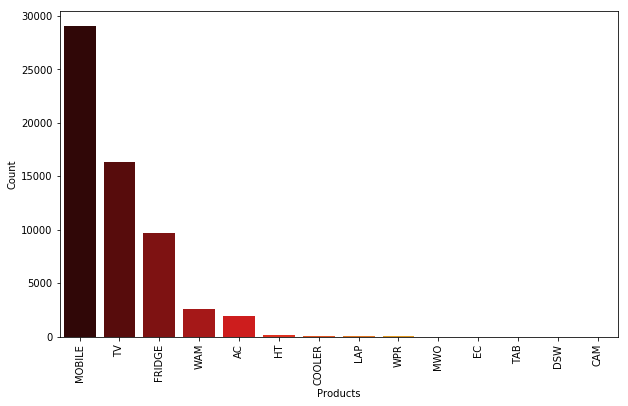

In [5]:
plt.figure(figsize=(10,6))
snp.barplot(data=top_product,y='Count',x='Products',palette="hot")
plt.xticks(rotation=90)

#Average emi cost per Product!

In [6]:
avg_cost=data.groupby(data['V19']).mean().reset_index()
avg_cost=avg_cost[['V19','V16']]
avg_cost=avg_cost.rename(columns={'V19':'Product','V16':'Average_Cost'})
avg_cost.sort_values(by='Average_Cost',ascending=False)

,Product,Average_Cost
0,AC,3256.736331
7,LAP,3014.478261
4,EC,2476.700000
11,TV,2364.060117
3,DSW,2362.500000
12,WAM,2131.234525
10,TAB,1862.250000
5,FRIDGE,1813.699784
13,WPR,1775.136364
8,MOBILE,1740.250430


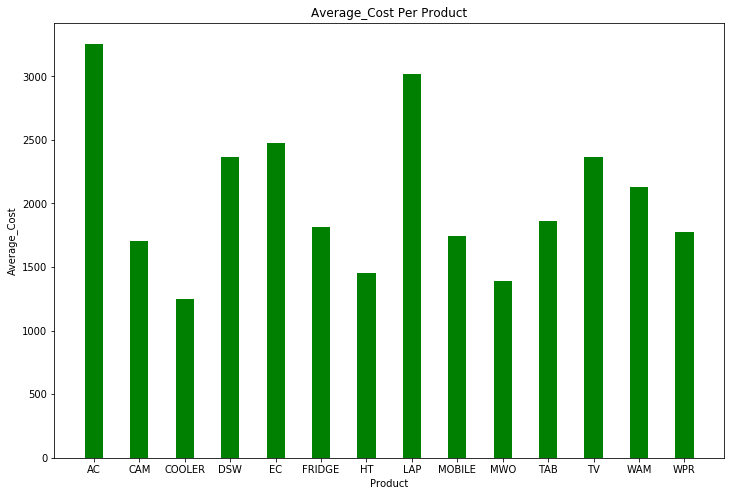

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(avg_cost['Product'], avg_cost['Average_Cost'], width= .4,color='green')
plt.xlabel('Product')
plt.ylabel('Average_Cost')
plt.title('Average_Cost Per Product')
plt.show()

#Education Wise Loan Type:

In [32]:
education_wise=data.groupby(data['V18']).size().reset_index()
education_wise.rename(columns={'V18':'Education',0:'Count'}).sort_values(by='Count',ascending=False)

,Education,Count
0,12TH,20169
1,GRADUATE,14987
5,SSC,13319
6,UNDER GRADUATE,6188
2,OTHERS,3739
3,POST-GRADUATE,1368
4,PROFESSIONAL,230


Most Paytment type:

In [33]:
payment_type=pd.crosstab(index= data['V17'], columns='Count').reset_index()
payment_type.sort_values(by= "Count", ascending= False)

col_0,V17,Count
7,NONE,28334
5,Debit/Credit Card,19952
8,Own house proof,7267
2,CIBIL,2197
6,Income Proof,783
0,Banking,760
9,Repayment,396
10,SAATHI,163
3,CRIF,129
4,Car RC,10


Customers who are rented the Products are defaulters

In [34]:
rented_customers=data[(data['V24']=='RENT') & (data['V27']==1)]
len(rented_customers)

2833

Customers who flowed in last month will they able to pay loan at next month

In [35]:
df=data[(data['V2']==1) & (data['V27']==0)]
len(df)

3281

#Bounce Reason

In [36]:
bounce_reason=data.groupby('V9').size().reset_index()
bounce_reason=bounce_reason.rename(columns={'V9':'Type',0:'Count'})

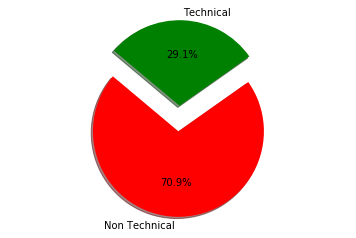

In [37]:
labels = ['Non Technical','Technical']
colors = ['red', 'green']
explode = (0.2, 0.1)  # explode 1st slice

plt.pie(x=bounce_reason['Count'], colors=colors,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)

plt.axis('equal')
plt.show()

#Top 10 customers who flowed so far most of the times:

In [38]:
top_customer=data[['V1','V3']]
top_customer.sort_values(by='V3',ascending=False,).head(10).rename(columns={'V1':'Customer_ID','V3':'Number of time flowed so  far'})

,Customer_ID,Number of time flowed so far
45789,AGMT45789,11.0
6062,AGMT6062,10.0
46022,AGMT46022,10.0
46167,AGMT46167,10.0
3977,AGMT3977,10.0
10348,AGMT10348,10.0
8758,AGMT8758,10.0
10105,AGMT10105,10.0
11265,AGMT11265,9.0
16692,AGMT16692,9.0


#Number of times the customer flowed in the last 3 months

In [39]:
customer_flowed_in_3_month=data[['V1','V4']]
customer_flowed_in_3_month.sort_values(by='V4',ascending=False).head(10).rename(columns={'V1':'Customer_ID','V4':'Number of time flowed in 3 month'})

,Customer_ID,Number of time flowed in 3 month
0,AGMT0,3.0
27028,AGMT27028,3.0
9927,AGMT9927,3.0
27077,AGMT27077,3.0
44587,AGMT44587,3.0
27069,AGMT27069,3.0
44603,AGMT44603,3.0
27039,AGMT27039,3.0
44607,AGMT44607,3.0
27029,AGMT27029,3.0


#Total enquiries made by the customer in the last 9 months

In [40]:
total_enquiry=data[['V1','V5']]
total_enquiry.sort_values(by='V5',ascending=False).head(10).rename(columns={'V5=1':'Customer_ID','V5':'Total Enquires'})

,V1,Total Enquires
30568,AGMT30568,107.0
3465,AGMT3465,79.0
4845,AGMT4845,74.0
47219,AGMT47219,73.0
30419,AGMT30419,71.0
33033,AGMT33033,67.0
16681,AGMT16681,63.0
46166,AGMT46166,62.0
28451,AGMT28451,59.0
16066,AGMT16066,59.0


#Percantage of Target

In [41]:
All = data.shape[0]
fraud = data[data['V27'] == 1]
nonFraud = data[data['V27'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 23.73 %
non frauds : 76.27000000000001 %


# Machine Learning

# Data Preprocessing

In [43]:
data.isnull().sum() #Checking null Values

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
dtype: int64

In [127]:
#data.drop_duplicates()   #Drop Duplicates

In [45]:
data.describe()

,V2,V3,V4,V5,V6,V8,V10,V11,V12,V16,V20,V21,V22,V25,V26,V27
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.209317,0.717083,0.501550,1.219133,549922.126233,2.079633,11.030585,0.321650,0.803917,1988.669967,13.230660,0.642017,10.898200,0.166016,0.280063,0.237300
std,0.406824,1.400681,0.926793,3.064224,94820.978162,1.133025,8.608485,1.192832,1.613943,798.943533,24.815495,1.277860,2.384205,0.278390,0.321677,0.425431
min,0.000000,0.000000,0.000000,0.000000,131001.000000,0.000000,-3.000000,0.000000,0.000000,537.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,441110.000000,1.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,563114.000000,3.000000,13.000000,0.000000,0.000000,1834.000000,0.000000,0.000000,10.000000,0.000000,0.166667,0.000000
75%,0.000000,1.000000,1.000000,1.000000,625012.000000,3.000000,18.500000,0.000000,1.000000,2299.000000,20.000000,1.000000,12.000000,0.333333,0.500000,0.000000
max,1.000000,11.000000,3.000000,107.000000,855116.000000,3.000000,40.000000,29.000000,37.000000,9250.000000,100.000000,10.000000,36.000000,1.000000,1.000000,1.000000


In [46]:
data.shape

(60000, 27)

In [47]:
data.V27.value_counts()

0.0    45762
1.0    14238
Name: V27, dtype: int64

In [48]:
#Removing uneccesay columns
data=data.drop(columns=['V1','V6','V7','V14'],axis=1)

In [49]:
data.columns

Index(['V2', 'V3', 'V4', 'V5', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27'],
      dtype='object')

In [67]:
#Seeing the unique values in categorical columns
dummies_col=['V9','V15','V24','V17','V18','V19','V23','V13']
for col in dummies_col:
    print(np.unique(data[col]))

['NonTechnical' 'Technical']
['CDNOR' 'CDOEM' 'CDSPL']
['OWNED' 'RENT']
['Banking' 'Business Proof' 'CIBIL' 'CRIF' 'Car RC' 'Debit/Credit Card'
 'Income Proof' 'NONE' 'Own house proof' 'Repayment' 'SAATHI']
['12TH' 'GRADUATE' 'OTHERS' 'POST-GRADUATE' 'PROFESSIONAL' 'SSC'
 'UNDER GRADUATE']
['AC' 'CAM' 'COOLER' 'DSW' 'EC' 'FRIDGE' 'HT' 'LAP' 'MOBILE' 'MWO' 'TAB'
 'TV' 'WAM' 'WPR']
['N' 'Y']
['N' 'Y']


In [68]:
#Converting them into get dummies
data=pd.get_dummies(data,columns=dummies_col)

In [70]:
X=data.drop('V27',axis=1)
X.head()
y=data['V27']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: V27, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

# Feature Selection Techique:

# Correlation

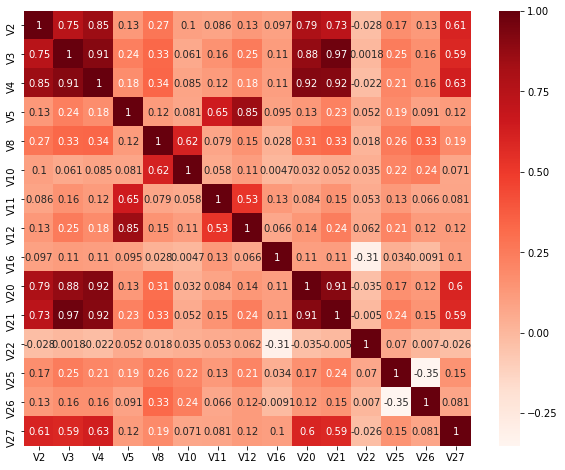

In [54]:
import seaborn as sns
f, ax =plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,annot=True,mask=np.zeros_like(corr,dtype=np.bool),cmap=plt.cm.Reds)

In [58]:
#Correlation with output variable
cor_target = abs(corr['V27'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

V2     0.606464
V3     0.592570
V4     0.633515
V20    0.603165
V21    0.586946
V27    1.000000
Name: V27, dtype: float64

As we can see, only the features V2,V3,V4,V20,V21 are highly correlated with the output variable.

# RFE Recursive Feature Elimination:

In [77]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
from sklearn.feature_selection import RFE
#Initializing RFE model
rfe = RFE(model,7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[ True False  True False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False  True  True False False]
[ 1 18  1 46 38 44 50 45 51 47  3 43 32 10 49  1 23 22 21  5  6 14 11 36
 12  1 17 16 15 13 37 35 42 40 24 39 25 30 41 34 31 19  1  2 28 26 20 48
  8  9 33 27  7  1  1 29  4]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.434929


In [80]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['V2', 'V4', 'V9_NonTechnical', 'V17_Car RC', 'V19_CAM', 'V19_COOLER',
       'V19_DSW', 'V19_EC', 'V19_HT', 'V19_TAB'],
      dtype='object')


# Ridge Regrresion

In [89]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [90]:
predictors = X_train.columns
predictors

Index(['V2', 'V3', 'V4', 'V5', 'V8', 'V10', 'V11', 'V12', 'V16', 'V20', 'V21',
       'V22', 'V25', 'V26', 'V9_NonTechnical', 'V9_Technical', 'V15_CDNOR',
       'V15_CDOEM', 'V15_CDSPL', 'V24_OWNED', 'V24_RENT', 'V17_Banking',
       'V17_Business Proof', 'V17_CIBIL', 'V17_CRIF', 'V17_Car RC',
       'V17_Debit/Credit Card', 'V17_Income Proof', 'V17_NONE',
       'V17_Own house proof', 'V17_Repayment', 'V17_SAATHI', 'V18_12TH',
       'V18_GRADUATE', 'V18_OTHERS', 'V18_POST-GRADUATE', 'V18_PROFESSIONAL',
       'V18_SSC', 'V18_UNDER GRADUATE', 'V19_AC', 'V19_CAM', 'V19_COOLER',
       'V19_DSW', 'V19_EC', 'V19_FRIDGE', 'V19_HT', 'V19_LAP', 'V19_MOBILE',
       'V19_MWO', 'V19_TAB', 'V19_TV', 'V19_WAM', 'V19_WPR', 'V23_N', 'V23_Y',
       'V13_N', 'V13_Y'],
      dtype='object')

RMSE =  0.31981969567334645  R2 =  0.44046778220356775


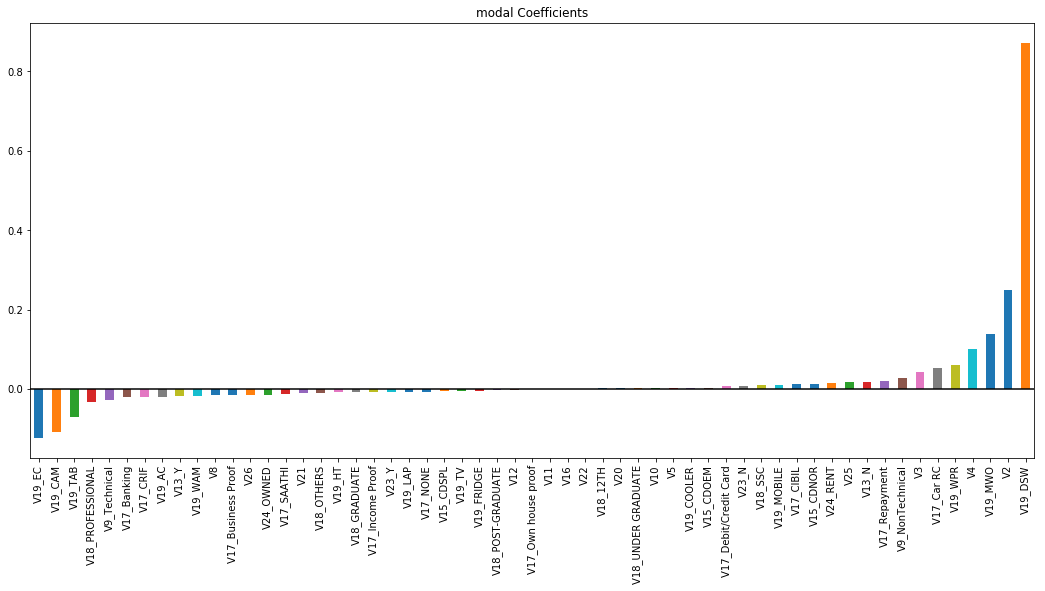

In [96]:
ridgeReg = Ridge(alpha = 0.01, normalize=True)
ridgeReg.fit(X_train, y_train)
pred = ridgeReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print("RMSE = ",rmse, " R2 = ",r2)
predictors = X_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(18,8))
coef.plot(kind = 'bar', title = 'modal Coefficients')
plt.hlines(y=0,xmin=-10,xmax=100)


# Lasso Rigression

In [120]:
from sklearn.linear_model import LassoCV
reg=LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.035006
Best score using built-in LassoCV: 0.370797


In [121]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 52 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

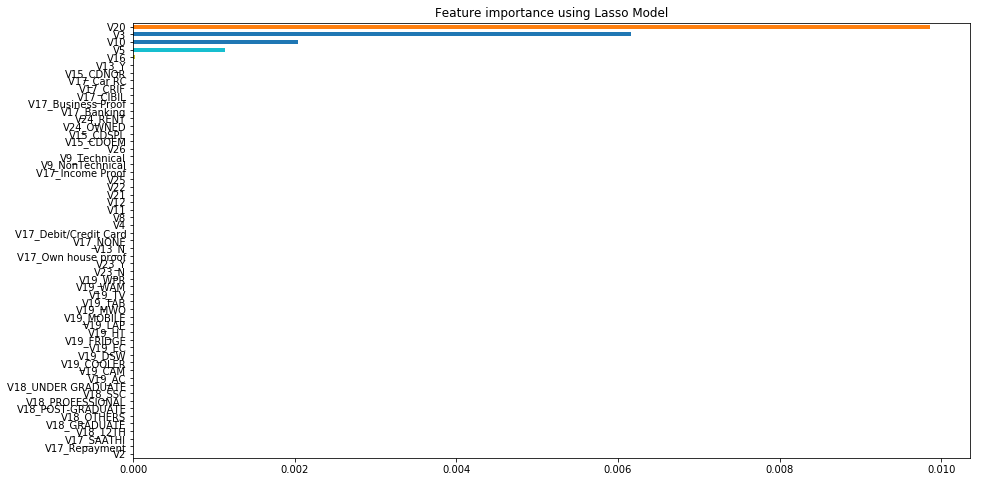

In [126]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken only V20,V3,V10,V5,V16 feature from all the feature

In [130]:
#NOW only important Features:

In [129]:
X1=data[['V2','V3','V4','V20','V21','V9_NonTechnical', 'V17_Car RC', 'V19_CAM', 'V19_COOLER','V19_DSW', 'V19_EC', 'V19_HT', 'V19_TAB','V10','V5','V16']]
Y1=data['V27']

# Logistic Regreession:

In [137]:
from sklearn.model_selection import train_test_split
X1_train, X1_test , Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2,random_state=1234)
from sklearn.linear_model import LogisticRegression

In [138]:
model=LogisticRegression()
model.fit(X1_train,Y1_train)
ypred=model.predict(X1_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
acc=model.score(X1_test,Y1_test)
acc

0.8650833333333333

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(Y1_test,ypred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[8571  639]
 [ 972 1818]]


In [157]:
from sklearn import metrics 
probs_log = model.predict_proba(X1_test)
prob_positive = probs_log[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.8346779641888395


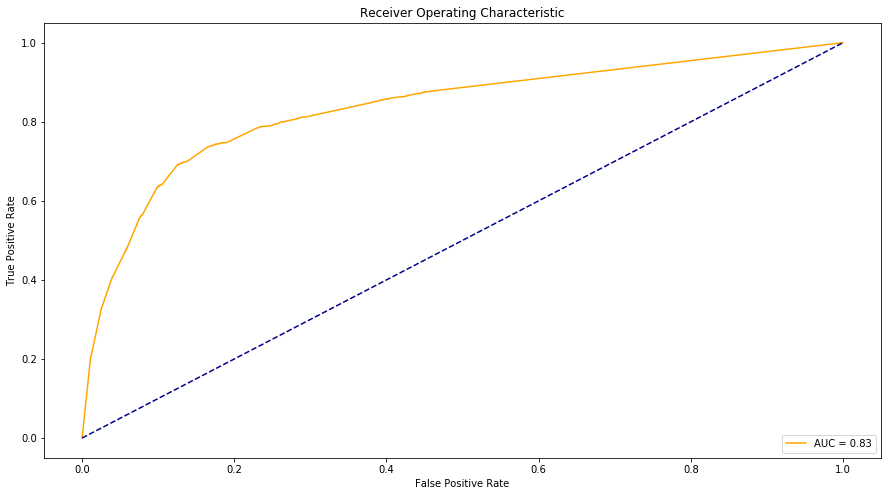

In [158]:
# plot ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decison Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model=clf.fit(X1_train,Y1_train)
ypred=model.predict(X1_test)
cm=confusion_matrix(Y1_test,ypred)
print(cm)
acc_decision_tree = round(model.score(X1_train, Y1_train) * 100, 2)
acc_decision_tree

[[8571  639]
 [ 972 1818]]


86.44

In [144]:
from sklearn.metrics import classification_report
report=classification_report(Y1_test,ypred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      9210
         1.0       0.74      0.65      0.69      2790

    accuracy                           0.87     12000
   macro avg       0.82      0.79      0.80     12000
weighted avg       0.86      0.87      0.86     12000



<Figure size 1800x864 with 0 Axes>

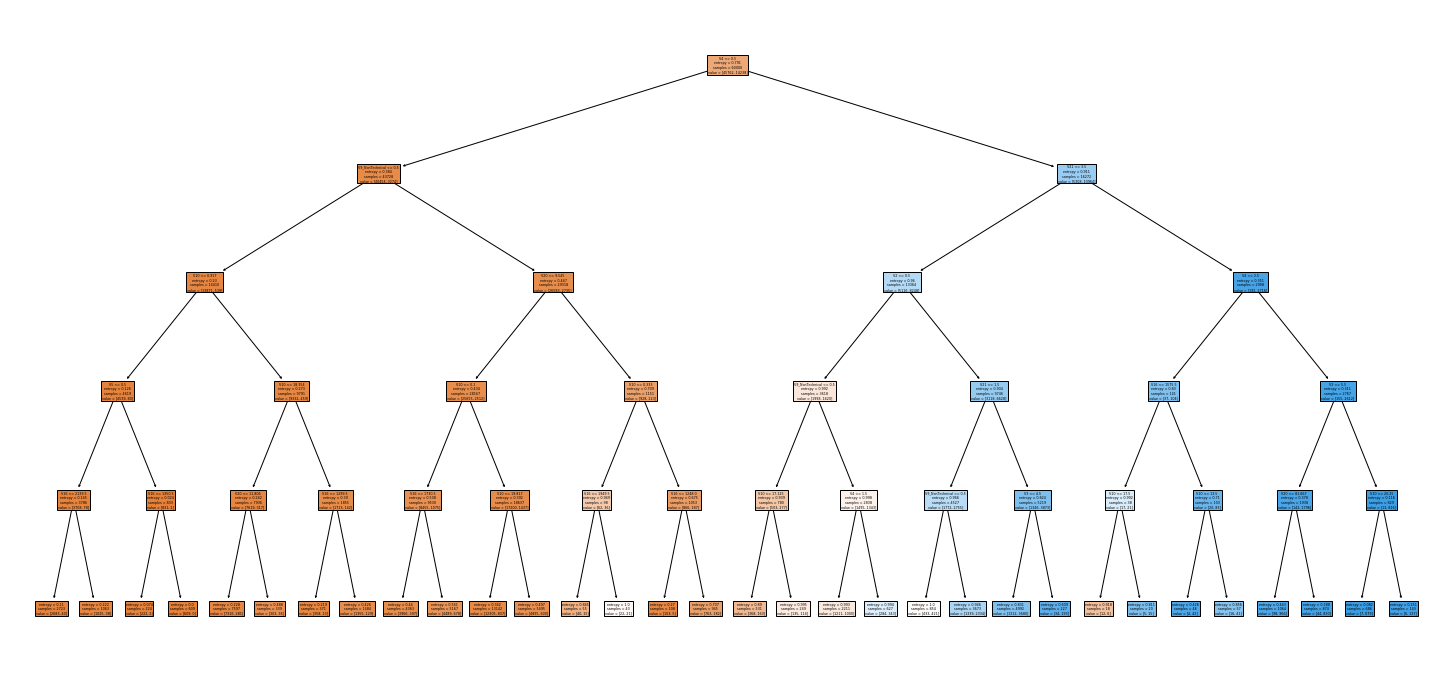

In [147]:
cols=list(X1.columns.values)

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,12))
plt.figure(figsize=(25,12))
tree.plot_tree(model.fit(X1,Y1),feature_names=cols,filled=True,label='all')
plt.show()

# Ensembling Method

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
model=RandomForestClassifier()
model.fit(X1_train,Y1_train)
y_pred=model.predict(X1_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [150]:
acc=accuracy_score(Y1_test,y_pred)
acc

0.838

# Important feature

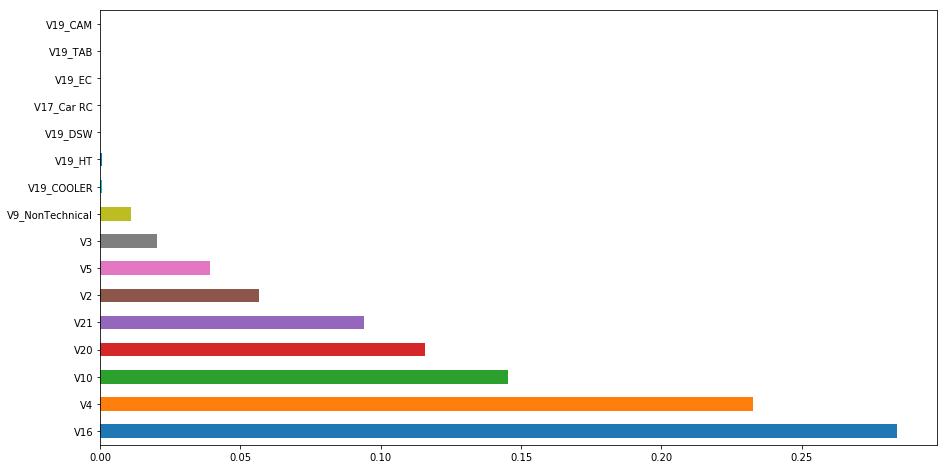

In [151]:
feat_importance=pd.Series(model.feature_importances_,index=X1.columns)
feat_importance=feat_importance.nlargest(20)
feat_importance.plot(kind='barh')

Looks Like (V16:EMI) contribute more in Defaulting Loans.